In [126]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns

pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [127]:
data= pd.read_csv('./income dataset.csv')
data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [129]:
#changing the column heading
col ={
    'age' : 'Age',
    'EdType': 'Qualification',
    'maritalstatus' : 'Marital_Status',
    'occupation':'Occupation',
    'relationship': 'Relationship',
    'race': 'Race',
    'gender': 'Gender',
    'capitalgain': 'Capital_Gain',
    'capitalloss':'Capital_Loss',
    'hoursperweek': 'Hours_per_week',
    'nativecountry': 'Native_Country',
    'SalStat': 'Salary_Status'
}
data = data.rename(columns=col)
data

,Age,JobType,Qualification,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_Country,Salary_Status
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [130]:
data.isnull().sum()

Age               0
JobType           0
Qualification     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Native_Country    0
Salary_Status     0
dtype: int64

In [131]:
data['Age'].unique()

array([45, 24, 44, 27, 20, 51, 17, 19, 60, 40, 30, 38, 23, 32, 54, 50, 37,
       52, 49, 22, 35, 67, 46, 33, 43, 28, 41, 25, 63, 59, 34, 26, 72, 62,
       58, 47, 39, 53, 57, 21, 42, 74, 36, 29, 31, 69, 18, 65, 55, 48, 71,
       70, 66, 56, 61, 68, 64, 73, 81, 78, 76, 90, 88, 75, 77, 80, 82, 79,
       83, 84, 85, 86, 87], dtype=int64)

In [132]:
data['JobType'].unique()

array([' Private', ' Federal-gov', ' ?', ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [133]:
data['Occupation'].unique()

array([' Adm-clerical', ' Armed-Forces', ' Prof-specialty',
       ' Craft-repair', ' Sales', ' Exec-managerial',
       ' Machine-op-inspct', ' ?', ' Transport-moving',
       ' Farming-fishing', ' Tech-support', ' Other-service',
       ' Handlers-cleaners', ' Protective-serv', ' Priv-house-serv'],
      dtype=object)

In [134]:
# replacing ? in data in values with Not specified
data.loc[data['JobType']== ' ?', 'JobType'] = 'Not Specified'
data.loc[data['Occupation']== ' ?', 'Occupation'] = 'Not Specified'
data

,Age,JobType,Qualification,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_Country,Salary_Status
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [135]:
data['JobType'].unique()

array([' Private', ' Federal-gov', 'Not Specified', ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [136]:
data['Occupation'].unique()

array([' Adm-clerical', ' Armed-Forces', ' Prof-specialty',
       ' Craft-repair', ' Sales', ' Exec-managerial',
       ' Machine-op-inspct', 'Not Specified', ' Transport-moving',
       ' Farming-fishing', ' Tech-support', ' Other-service',
       ' Handlers-cleaners', ' Protective-serv', ' Priv-house-serv'],
      dtype=object)

In [137]:
data.head(20)

,Age,JobType,Qualification,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_Country,Salary_Status
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,Not Specified,11th,Never-married,Not Specified,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [138]:
int_data_types = data[['Age', 'Capital_Gain','Capital_Loss','Hours_per_week']]
int_data_types

,Age,Capital_Gain,Capital_Loss,Hours_per_week
0,45,0,0,28
1,24,0,0,40
2,44,0,0,40
3,27,0,0,40
4,20,0,0,35
...,...,...,...,...
31973,34,594,0,60
31974,34,0,0,40
31975,23,0,0,40
31976,42,0,0,40


In [139]:
int_fig =int_data_types.describe()
int_fig

,Age,Capital_Gain,Capital_Loss,Hours_per_week
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [140]:
#changing the Salary Status to 0s and 1.. 0 is less than or equal to 50K and 1 is greater than 50K
data.loc[data['Salary_Status']== ' less than or equal to 50,000', 'Salary_Status'] = '<=50K'
data.loc[data['Salary_Status']== ' greater than 50,000', 'Salary_Status'] = '>50K'
data.head(20)

,Age,JobType,Qualification,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_Country,Salary_Status
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,<=50K
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,<=50K
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,<=50K
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,<=50K
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,<=50K
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
8,17,Not Specified,11th,Never-married,Not Specified,Own-child,White,Female,0,0,5,United-States,<=50K
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,<=50K


In [174]:
#Salary_Status Comparison for the demographic region
salary_count = data['Salary_Status'].value_counts()
salary_count = pd.DataFrame({'Value': salary_count.index, 'Count': salary_count.values})
fig = px.bar(
    salary_count, 
    x='Value', 
    y='Count', 
    color = 'Value',
    color_continuous_scale='PiYG',
    title='Salary Comparison for individuals in the Demographic Area', 
    labels={'Value': 'Salary_Status', 'Count': 'Count'})
fig.show()


In [175]:
#Race comparison
race_count = data['Race'].value_counts()
race_count = pd.DataFrame({'Value': race_count.index, 'Count': race_count.values})
fig = px.bar(
    race_count, 
    x='Value', 
    y='Count', 
    color = 'Value',
    color_continuous_scale='PiYG',
    title='Count of Various Races in the Demographic Area', 
    labels={'Value': 'Races', 'Count': 'Count'})
fig.show()


Race
White                 27430
Black                  3028
Asian-Pac-Islander      956
Amer-Indian-Eskimo      311
Other                   253
Name: count, dtype: int64

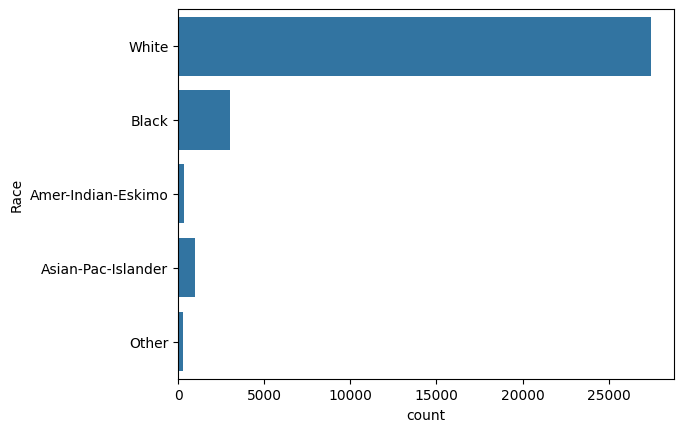

In [145]:
#Race Comparison for the demographic region
data['Race']= [cols.replace(' ','')for cols in data['Race'] ]
sns.countplot(data=data,y= 'Race')
race_count = data['Race'].value_counts()
race_count

In [181]:
#Salary_Status Comparison for the demographic region
native_country_count = data['Native_Country'].value_counts()
native_country_count = pd.DataFrame({'Value': native_country_count.index, 'Count': native_country_count.values})
native_country_count
#fig = px.bar(
    #native_country_count, 
    #x='Value', 
    #y='Count', 
    #color = 'Value',
    #color_continuous_scale='PiYG',
    #title='Salary Comparison for individuals in the Demographic Area', 
    #labels={'Value': 'Salary_Status', 'Count': 'Count'})
#fig.show()

,Value,Count
0,United-States,29170
1,Mexico,643
2,Philippines,198
3,Germany,137
4,Canada,121
5,Puerto-Rico,114
6,El-Salvador,106
7,India,100
8,Cuba,95
9,England,90


In [183]:
#Gender comparison
gender_count = data['Gender'].value_counts()
gender_count = pd.DataFrame({'Value': gender_count.index, 'Count': gender_count.values})
fig = px.pie(
    gender_count, 
    names='Value', 
    values='Count', 
    color = 'Value',
    title='Gender Comparison in the Demographic Area', 
    labels={'Value': 'Races', 'Count': 'Count'})
fig.show()
